In [1]:
import cv2
import numpy as np
import os 
from time import sleep

from IPython.display import clear_output
# My custom library of photoelastic tools
import sys
#sys.path.append('/home/jack/workspaces/jupyter-workspace/pepe/')
sys.path.append('/eno/jdfeathe/pepe/')

from pepe.preprocess import crossMask, checkImageType, circularMask, lightCorrectionDiff
from pepe.tracking import houghCircle, convCircle
from pepe.visualize import visCircles

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

from PIL import Image

#dataFolder = '/run/media/jack/Seagate Portable Drive/Research/SpaceJam/'
testFile = '/eno/jdfeathe/DATA/2022-05-16_temp.bmp'

In [9]:
circleTrackingKwargs = {"intensitySoftmax": 2., "intensitySoftmin": 1.8, "peakDownsample": 2,
                        "minPeakPrevalence": .1, "offscreenParticles": False,
                        "radiusTolerance": None, "negativeHalo": True, "fitPeaks": False,
                        "allowOverlap": True}

maskArr = checkImageType('../masks/2022-05-16_FullMask.bmp')
radius = 160
pxPerMeter = (radius*2) / .015

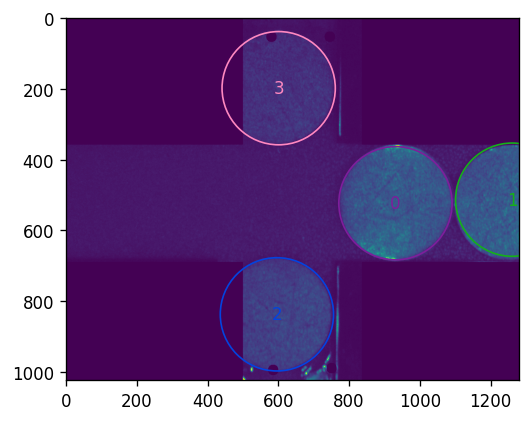

Separation: 319.01956151592105px
Separation: 0.014954041946058799m
Fraction of particle diameter: 0.9969361297372533


KeyboardInterrupt: 

In [10]:
while True:
    try:
        image = checkImageType(testFile)
    except:
        continue
    
    
    particleCenters, particleRadii = convCircle(image[:,:,0] * maskArr[:,:,0], radius,
                                                debug=False, intensitySoftmax=2., intensitySoftmin=None, peakDownsample=5,
                                                offscreenParticles=True, radiusTolerance=None, negativeHalo=True)
    
    clear_output(wait=True)
    # Find the distance between the top and bottom particles
    topIndex = np.argmin([np.sum((particleCenters[i] - np.array([200, 600]))**2) for i in range(len(particleCenters))])
    bottomIndex = np.argmin([np.sum((particleCenters[i] - np.array([800, 600]))**2) for i in range(len(particleCenters))])

    separation = np.sqrt(np.sum((particleCenters[topIndex] - particleCenters[bottomIndex]).astype(np.float64)**2)) - 2*radius

    ax = visCircles(particleCenters, particleRadii, annotations=np.arange(len(particleCenters)), setBounds=False)
    ax.imshow(image[:,:,0] * maskArr[:,:,0])
    plt.show()
    
    print(f'Separation: {separation}px')
    print(f'Separation: {separation/pxPerMeter}m')
    print(f'Fraction of particle diameter: {separation/(2*radius)}')

65536